In [19]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# import df

df = pd.read_csv(r'D:\عبدالغفور\Lec.2\assginments\Financials.csv')
df

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,NaN,1618.5,3.0,20.0,32370.0,-1.00,32370.00,16185.0,16185.00,1/1/2014,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3.0,20.0,26420.0,-1.00,26420.00,13210.0,13210.00,1/1/2014,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3.0,15.0,32670.0,-1.00,32670.00,21780.0,10890.00,1/6/2014,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3.0,15.0,13320.0,-1.00,13320.00,8880.0,4440.00,1/6/2014,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3.0,15.0,37050.0,-1.00,37050.00,24700.0,12350.00,1/6/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,SmallBusiness,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,1/3/2014,3,March,2014
696,SmallBusiness,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,1/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,1/2/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,1/4/2014,4,April,2014


In [21]:
#clean df

#check null vslues

df.isnull().sum()

Segment                0
Country                0
Product                0
DiscountBand          53
UnitsSold              0
ManufacturingPrice     0
SalePrice              0
GrossSales             0
Discounts              0
Sales                  0
COGS                   0
Profit                 1
Date                   0
MonthNumber            0
MonthName              0
Year                   0
dtype: int64

In [22]:

# List of columns to process
columns = ['ManufacturingPrice', 'SalePrice', 'GrossSales', 'Discounts', 'Sales', 'COGS', 'Profit']
# Convert columns to numeric, forcing errors to NaN
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')


In [23]:
# Handle null values in DiscountBand by the most values repeated in the column

df['DiscountBand'].fillna(df['DiscountBand'].mode()[0], inplace=True)

# Handle null values in Profit by the mean median value

df['Profit'].fillna(df['Profit'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8644\2126069583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DiscountBand'].fillna(df['DiscountBand'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8644\2126069583.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [24]:
#check null values again

df.isnull().sum()

Segment               0
Country               0
Product               0
DiscountBand          0
UnitsSold             0
ManufacturingPrice    0
SalePrice             0
GrossSales            0
Discounts             0
Sales                 0
COGS                  0
Profit                0
Date                  0
MonthNumber           0
MonthName             0
Year                  0
dtype: int64

In [25]:
# check duplicates

duplicates = df.duplicated()
duplicates.sum()

0

In [26]:
# dayaset column information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Segment             700 non-null    object 
 1   Country             700 non-null    object 
 2   Product             700 non-null    object 
 3   DiscountBand        700 non-null    object 
 4   UnitsSold           700 non-null    float64
 5   ManufacturingPrice  700 non-null    float64
 6   SalePrice           700 non-null    float64
 7   GrossSales          700 non-null    float64
 8   Discounts           700 non-null    float64
 9   Sales               700 non-null    float64
 10  COGS                700 non-null    float64
 11  Profit              700 non-null    float64
 12  Date                700 non-null    object 
 13  MonthNumber         700 non-null    int64  
 14  MonthName           700 non-null    object 
 15  Year                700 non-null    int64  
dtypes: float

In [27]:
# Replace '-' with 0 in specified columns
df[columns] = df[columns].replace('-', 0)

In [28]:
# replace rows with (-1) values in ['ManufacturingPrice', 'SalePrice', 'GrossSales', 'Discounts', 'Sales', 'COGS', 'Profit'] to the median calues in each column

for col in columns:
    median_value = df[col].median()  # Calculate the median
    df[col] = df[col].replace(-1, median_value)  # Replace -1 with the median


In [29]:

# Convert 'Profit' column to float64 type
df['Profit'] = df['Profit'].astype('float64')

In [30]:
# convert Date column to date column into date type

df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Segment             700 non-null    object        
 1   Country             700 non-null    object        
 2   Product             700 non-null    object        
 3   DiscountBand        700 non-null    object        
 4   UnitsSold           700 non-null    float64       
 5   ManufacturingPrice  700 non-null    float64       
 6   SalePrice           700 non-null    float64       
 7   GrossSales          700 non-null    float64       
 8   Discounts           700 non-null    float64       
 9   Sales               700 non-null    float64       
 10  COGS                700 non-null    float64       
 11  Profit              700 non-null    float64       
 12  Date                700 non-null    datetime64[ns]
 13  MonthNumber         700 non-null    int64         

In [32]:
df.head()

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,High,1618.5,3.0,20.0,32370.0,2585.25,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,High,1321.0,3.0,20.0,26420.0,2585.25,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,High,2178.0,3.0,15.0,32670.0,2585.25,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,High,888.0,3.0,15.0,13320.0,2585.25,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,High,2470.0,3.0,15.0,37050.0,2585.25,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


In [33]:
############################ NOTE ############################

# Column types handling and invalid values are handles using Excel

In [34]:
# List of columns to check for outliers
columns_to_check = ['UnitsSold', 'ManufacturingPrice', 'SalePrice', 'GrossSales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Function to detect and handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Handling outliers: Option 1 - Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Handling outliers: Option 2 - Cap outliers (alternative to removing)
    # df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Apply the function to each column in the list
for col in columns_to_check:
    df = handle_outliers(df, col)

In [35]:
# Apply Min-Max Normalization
for col in columns:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

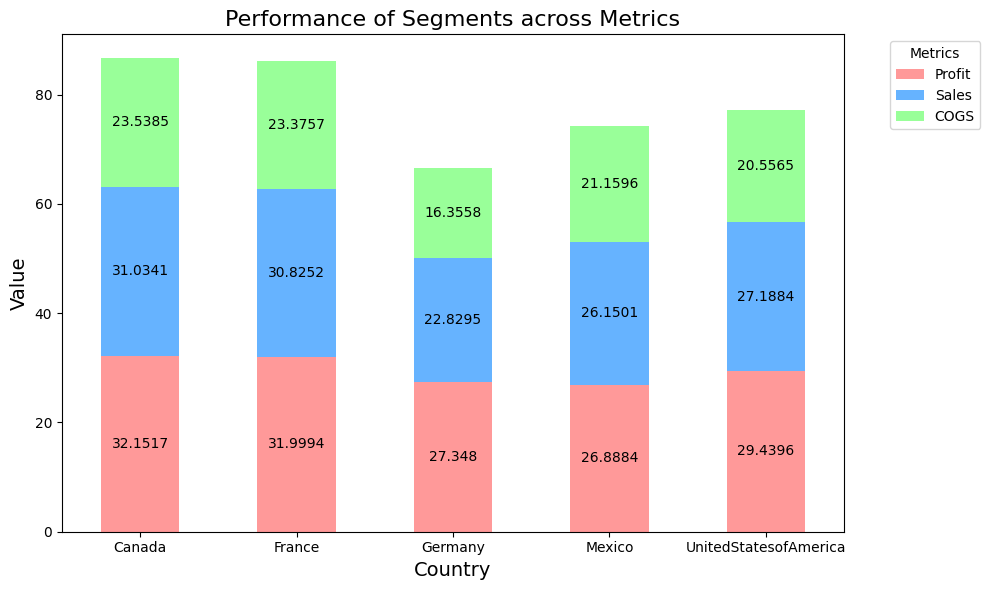

In [36]:
# Example stacked bar chart for Profit, Sales, and COGS across different countries
metrics = ['Profit', 'Sales', 'COGS']
df_grouped = df.groupby('Country')[metrics].sum()

# Plotting the stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff','#99ff99'], figsize=(10, 6))

# Add labels inside the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=10, color='black')

# Customize the plot
plt.title('Performance of Segments across Metrics', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()